In [2]:
import numpy as np 
import matplotlib as pt

In [21]:
orth = SymmetricGroupRepresentation([3,3],'orthogonal');


In [8]:
S12 = np.array(orth.representation_matrix((1,2)))
print(S12)
print('----')
S23 = np.array(orth.representation_matrix((2,3)))
print(S23)
print('----')
S14 = np.array(orth.representation_matrix((1,4)))
print(S14)
print('----')




[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 -1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 -1]]
----
[[1 0 0 0 0]
 [0 -1/2 1/2*sqrt(3) 0 0]
 [0 1/2*sqrt(3) 1/2 0 0]
 [0 0 0 -1/2 1/2*sqrt(3)]
 [0 0 0 1/2*sqrt(3) 1/2]]
----
[[-1/3 -1/3*sqrt(2) -1/3*sqrt(3)*sqrt(2) 0 0]
 [-1/3*sqrt(2) 5/6 -1/6*sqrt(3) 0 0]
 [-1/3*sqrt(3)*sqrt(2) -1/6*sqrt(3) 1/2 0 0]
 [0 0 0 -1/2 1/2*sqrt(3)]
 [0 0 0 1/2*sqrt(3) 1/2]]
----


In [4]:
# S12 = np.array(orth.representation_matrix((1,2)))
# print(S12)
# print('----')
# S23 = np.array(orth.representation_matrix((2,3)))
# print(S23)
# print('----')
# S14 = np.array(orth.representation_matrix((1,4)))
# print(S23)
# print('----')

Hamiltonian = dict()
Hamiltonian['J1'] = [(1,2), (2,3), (1,4), (3,4)]
Hamiltonian['J2'] = [(1,3), (2,4)]
print(Hamiltonian)
print(list(Hamiltonian.keys()))


{'J1': [(1, 2), (2, 3), (1, 4), (3, 4)], 'J2': [(1, 3), (2, 4)]}
['J1', 'J2']


In [5]:
rep_mat = np.multiply(-2, np.diag(np.ones(5)))
print(rep_mat)

[[-2. -0. -0. -0. -0.]
 [-0. -2. -0. -0. -0.]
 [-0. -0. -2. -0. -0.]
 [-0. -0. -0. -2. -0.]
 [-0. -0. -0. -0. -2.]]


In [27]:
def rep_matrix(st, partit): 
    orth =SymmetricGroupRepresentation(partit,'orthogonal');
    mat = np.array(orth.representation_matrix(st))
    return mat 
          

def Ham_rep(H, J, partit): 
    ls = list(H.keys())
    orth = SymmetricGroupRepresentation(partit,'orthogonal');
    dim = len(np.array(orth.representation_matrix((1,2))))

#     print(ls)
    rep_mat0 = np.multiply(-3.5, np.diag(np.ones(dim)))
    for st in H[ls[0]]:
#         print(H[ls[0]])
#         print(st)
        rep_st = rep_matrix(st, partit)
#         print(rep_st)
        rep_mat0 = rep_mat0 + rep_st
    rep_mat0 = np.multiply(J[0] , rep_mat0)
    print(rep_mat0) 
    if float(J[1]) ==float(0):
        return rep_mat0
    else:
        rep_mat1 = np.multiply(-3.0, np.diag(np.ones(dim)))
        for st in H[ls[1]]:
            rep_st = rep_matrix(st, partit)
    #         print(rep_st)
            rep_mat1 = rep_mat1 + rep_st
        rep_mat1 = np.multiply(J[1], rep_mat1)
        rep_mat_H = np.add(rep_mat0, rep_mat1)
        return rep_mat_H




Hamiltonian = dict()
# Hamiltonian['J1'] = [(1,3), (2,3), (2,4), (1,4)]
# Hamiltonian['J1'] = [(1,2), (2,3), (3,4), (1,4)]
# Hamiltonian['J2'] = [(1,3), (2,4)]
# print(Hamiltonian)
# print(list(Hamiltonian.keys()))

Hamiltonian['J1'] = [(1,6), (1,2), (2,3), (2,5), (3,4),(5,6), (4,5)]
Hamiltonian['J2'] = [(1,5), (2,6), (2,4), (3,5),(1,3), (4,6)]

# ID Chain model 

# Hamiltonian['J1'] = [(1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8),(8,1)]


ham_J0 =Ham_rep(Hamiltonian, [0.5, 0.5],[3,3])
print(ham_J0)
    
    

[[-0.2500000000000002 0.5*sqrt(2) 0 0 0.5*sqrt(2)]
 [0.5*sqrt(2) -1.2499999999999998 0.25*sqrt(3) 0.25*sqrt(3) -0.5]
 [0 0.25*sqrt(3) -0.75 -0.5 0.25*sqrt(3)]
 [0 0.25*sqrt(3) -0.5 -0.75 0.25*sqrt(3)]
 [0.5*sqrt(2) -0.5 0.25*sqrt(3) 0.25*sqrt(3) -2.25]]
[[-1.4166666666666667 0.33333333333333337*sqrt(2)
  0.16666666666666666*sqrt(3)*sqrt(2) 0.16666666666666666*sqrt(3)*sqrt(2)
  0]
 [0.33333333333333337*sqrt(2) -2.583333333333333
  0.08333333333333334*sqrt(3) 0.08333333333333334*sqrt(3) 0.0]
 [0.16666666666666666*sqrt(3)*sqrt(2) 0.08333333333333334*sqrt(3) -1.75
  0.0 -0.25*sqrt(3)]
 [0.16666666666666666*sqrt(3)*sqrt(2) 0.08333333333333334*sqrt(3) 0.0
  -1.75 -0.25*sqrt(3)]
 [0 0.0 -0.25*sqrt(3) -0.25*sqrt(3) -2.25]]


In [28]:
from numpy.linalg import eig
v,w = eig(ham_J0.astype('float64'))
print(v)
print('----')
print(w)
print('---min---')
print(min(v))

[-0.75 -1.75 -2.75 -2.75 -1.75]
----
[[-0.70710678 -0.57735027 -0.40824829 -0.12151966 -0.05919242]
 [-0.25       -0.20412415  0.72168784  0.799433   -0.02092768]
 [-0.4330127   0.35355339  0.25       -0.26311209  0.73962849]
 [-0.4330127   0.35355339  0.25       -0.26311209 -0.66713288]
 [ 0.25       -0.61237244  0.4330127  -0.45572351 -0.06278304]]
---min---
-2.7500000000000004


In [33]:
dims = [0, 1, 2, 3, 4, 5, 6]
Hamiltonian['J1'] = [(1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8),(8,9), (9, 10), (10, 11), (11, 12), (12, 1)]
for i in range(len(dims)):
    ham_J0 =Ham_rep(Hamiltonian, [0.5, 0], [len(dims) -1 + i,len(dims)-1 - i])
    v,w = eig(ham_J0.astype('float64'))
    if i ==0: 
        print('sorted S=0 irrep eigenvalue {}'.format(sorted(v)))
    print('-------')
    
    print('min eigenvalue for irrep S = {}: {}'.format(i, min(v)))

sorted S=0 irrep eigenvalue [-3.3873909174452073, -2.777389333701305, -2.0006004295974833, -2.0006004295974815, -1.8741793276237206, -1.8741793276237195, -1.538942424614418, -1.538942424614412, -1.4949134260396273, -1.494913426039621, -1.3402074887360902, -1.229463841147074, -0.7834087141245156, -0.7834087141245107, -0.7682047892231447, -0.7682047892231444, -0.7675990794044536, -0.7675990794044519, -0.759660612274257, -0.7596606122742562, -0.5611643596126704, -0.56116435961267, -0.40183822587034457, -0.35205031765103356, -0.20365300993557017, -0.07767465698669612, -0.07767465698669422, -0.03646144299697085, -0.03646144299697075, -0.03168146955555465, -0.031681469555554106, -0.012833098445455283, -0.012833098445454402, 0.0006356964985979478, 0.0006356964985988492, 0.14298391178758832, 0.1429839117875886, 0.3860700516705572, 0.3893240045359709, 0.3893240045359711, 0.4999999999999991, 0.5000000000000002, 0.5150210681186311, 0.515021068118634, 0.5329336500328422, 0.627401613381543, 0.62740

## Compute Symmetric Group Action

In [44]:
from sage.combinat.permutation import Permutations_mset
from sage.combinat.symmetric_group_algebra import e_hat
mset = [0,0,0,0,1,1,1,1]
Mu = Permutations_mset(mset)
Y = e_hat([[1,2], [3,4]])
S4 = SymmetricGroupAlgebra(CC,4)
Y = S4(Y)
H = S4([1,2,3,4])



In [10]:
from sage.combinat.permutation import bistochastic_as_sum_of_permutations
L = []
L.append((9,Permutation([4, 1, 3, 5, 2])))
L.append((6,Permutation([5, 3, 4, 1, 2])))
L.append((3,Permutation([3, 1, 4, 2, 5])))
L.append((2,Permutation([1, 4, 2, 3, 5])))
M = sum([c * p.to_matrix() for (c,p) in L])
print(M)

[ 2 12  0  6  0]
[ 0  0  2  3 15]
[ 3  6  9  2  0]
[ 9  2  9  0  0]
[ 6  0  0  9  5]


In [11]:
CS3 = SymmetricGroupAlgebra(CC, 3)
X1 = CS3.jucys_murphy(2)
print(X1)

1.00000000000000*[2, 1, 3]


In [12]:
a = CS3.central_orthogonal_idempotents()
print(a)

[0.166666666666667*[1, 2, 3] + 0.166666666666667*[1, 3, 2] + 0.166666666666667*[2, 1, 3] + 0.166666666666667*[2, 3, 1] + 0.166666666666667*[3, 1, 2] + 0.166666666666667*[3, 2, 1], 0.666666666666667*[1, 2, 3] - 0.333333333333333*[2, 3, 1] - 0.333333333333333*[3, 1, 2], 0.166666666666667*[1, 2, 3] - 0.166666666666667*[1, 3, 2] - 0.166666666666667*[2, 1, 3] + 0.166666666666667*[2, 3, 1] + 0.166666666666667*[3, 1, 2] - 0.166666666666667*[3, 2, 1]]


## State Initialization 


In [3]:
from sympy.physics.quantum.spin import JzKetCoupled,JzBraCoupled
from sympy import symbols
from sympy.physics.quantum.represent import represent 
from sympy.physics.quantum.represent import TensorProduct 
from sympy.physics.quantum.innerproduct import InnerProduct
from sympy.physics.quantum.spin import JzBra
1
# # v = JzKetCoupled(0,0, (1/2, 1/2, 1/2, 1/2), ((1,2,0), (1,3,1/2),(1,4,0))).rewrite('Jz', coupled=False)
# # represent(v)
# v = JzKetCoupled(1,0, (1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/2), 
#                  ((1,2,1), (1,3,3/2),(1,4,2),(1,5,5/2), 
#                   (1,6,3), (1,7,7/2), (1,8,4)).rewrite('Jz', coupled=False)


# # w = TensorProduct(JzKetCoupled(1,0,(1/2, 1/2)).rewrite('Jz', coupled=False),
# #                   JzKetCoupled(1,0,(1/2, 1/2)).rewrite('Jz', coupled=False),
# #                  JzKetCoupled(1,0,(1/2, 1/2)).rewrite('Jz', coupled=False),
# #                  JzKetCoupled(1,0,(1/2, 1/2)).rewrite('Jz', coupled=False))
# # v2 = JzBraCoupled(1,0, (1/2, 1/2, 1/2, 1/2), ((1,2,1), (1,3,3/2),(1,4,1))).rewrite('Jz', coupled=False)
# # w = JzBra(w)
# # i = InnerProduct(v,v)
# # i.doit()
# # represent(w); 
# # print(w)

# # w_vec = represent(w)
# # print(v_vec)
# v_vec = represent(v)
# i = np.inner(np.transpose(w_vec), np.transpose(v_vec))
# print(i)

1

In [12]:
v = JzKetCoupled(1,1, (1/2, 1/2, 1/2, 1/2, 1/2, 1/2), 
                 ((1,2,1), (1,3,1/2),(1,4,1),(1,5,3/2), 
                  (1,6,1))).rewrite('Jz', coupled=False)

w = TensorProduct(JzKetCoupled(1,1,(1/2, 1/2)).rewrite('Jz', coupled=False),
                 JzKetCoupled(0,0,(1/2, 1/2)).rewrite('Jz', coupled=False), 
                 JzKetCoupled(0,0,(1/2, 1/2)).rewrite('Jz', coupled=False))

w_vec = represent(w)
v_vec = represent(v)
i = np.inner(np.transpose(w_vec), np.transpose(v_vec))
print(i)

[[-sqrt(2)/3]]


In [5]:
v = JzKetCoupled(2,2, (1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/2), 
                 ((1,2,1), (1,3,3/2),(1,4,2),(1,5,3/2), 
                  (1,6,2), (1,7,3/2), (1,8,2))).rewrite('Jz', coupled=False)
print(v)

# v = JzKetCoupled(2,0, (1/2, 1/2, 1/2, 1/2, 1/2, 1/2), 
#                  ((1,2,1), (1,3,3/2),(1,4,2),(1,5,3/2), 
#                   (1,6,2))).rewrite('Jz', coupled=False)

|1/2,-1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>/10 + |1/2,-1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>/10 + |1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>/10 - 3*|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>/20 + |1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>/20 - |1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>/5 + |1/2,1/2>x|1/2,-1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>/10 + |1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>/10 - 3*|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>/20 + |1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>/20 - |1/2,1/2>x|1/2,-1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,1/2>/5 + |1/2,1/2>x|1/2,1/2>x|1/2,-1/2>x|1/2,-1/2>

In [196]:
w = TensorProduct(JzKetCoupled(1,0,(1/2, 1/2)).rewrite('Jz', coupled=False),
                  JzKetCoupled(1,0,(1/2, 1/2)).rewrite('Jz', coupled=False),
                 JzKetCoupled(1,0,(1/2, 1/2)).rewrite('Jz', coupled=False),
                 JzKetCoupled(0,0,(1/2, 1/2)).rewrite('Jz', coupled=False))

In [197]:
w_vec = represent(w)
v_vec = represent(v)
i = np.inner(np.transpose(w_vec), np.transpose(v_vec))
print(i)

[[2*sqrt(5)/15]]


In [194]:
print(14/35 + 12/45 + 1/3)

1


In [126]:
from sympy.physics.quantum.cg import CG
from sympy import S 
for j in range(100):
    cg = CG(S(j), S(0), S(1), 0 , S(j), S(0)) 
    print(cg.doit())


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Heisenberg Model 

(0, 2)
(0, 1)
(1, 3)
(2, 3)


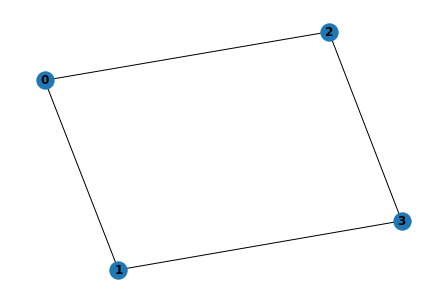

In [51]:
import pennylane as qml
import networkx as nx


graph = nx.generators.lattice.grid_2d_graph(2,2)
graph = nx.relabel.convert_node_labels_to_integers(graph)
obs = []
coeffs = []
for edge in graph.edges():
    print(edge)
    coeffs.extend([1.0, 1.0, 1.0])
    obs.extend([qml.PauliX(edge[0]) @ qml.PauliX(edge[1]),
                        qml.PauliY(edge[0]) @ qml.PauliY(edge[1]),
                        qml.PauliZ(edge[0]) @ qml.PauliZ(edge[1])])
hamiltonian_heisenberg = qml.Hamiltonian(coeffs, obs)


nx.draw(graph, with_labels=True, font_weight='bold')

## Young Tableau


In [125]:
def Young_tableau_path(partition):
    shape = len(partition)
    paths = []
#     partition1 = partition
    if len(partition) ==1 & partition[0] ==1: 
        return 
    for i in np.arange(shape ): 
#         temp = partition
#         partition = partition1
        temp = list(partition)
#         print(temp)
        if i == shape -1: 
            if partition[i]  == 1: 
                temp = partition[0:i]
            else: 
                temp[i ] = partition[i ] - 1
#             print(temp)
            paths.append(temp)
            return paths
        if partition[i] - partition[i+1] > 0: 
            if partition[i] == 1:
                temp = partition[0:i]
            else:
                temp[i] = partition[i] - 1
#             print(temp)
            paths.append(temp)
#         temp = partition 

def get_young_basis(partition):
    num = sum(partition)
    tableaux_num = [1]
    paths = Young_tableau_path(partition)
    if len(partition) < 1: 
        return False 
#     elif len(partition)==1:
#         tableaux_num = [[[i for i in range(1, num+1)]]] 
    elif paths is None: 
        return paths 
    else:
        for i in range(len(paths)):
            tableaux_num
            paths[i].append(get_young_basis(paths[i]))
#             paths[i].append( get_young_basis(paths[i]))
#             trash, tableaux_num[-1] = get_young_basis(paths[i])[1]
    return (paths, tableaux_num) 

        
part = [3,2,2,1]
# print(part[0:3])
paths = Young_tableau_path(part)
print(paths)
partition = [3,2,2,1]
tab, tableaux = get_young_basis(partition)
print(tab[0])
    

[[2, 2, 2, 1], [3, 2, 1, 1], [3, 2, 2]]
[2, 2, 2, 1, ([[2, 2, 1, 1, ([[2, 1, 1, 1, ([[1, 1, 1, 1, ([[1, 1, 1, ([[1, 1, ([[1, None]], [1])]], [1])]], [1])], [2, 1, 1, ([[1, 1, 1, ([[1, 1, ([[1, None]], [1])]], [1])], [2, 1, ([[1, 1, ([[1, None]], [1])], [2, ([[1, None]], [1])]], [1])]], [1])]], [1])], [2, 2, 1, ([[2, 1, 1, ([[1, 1, 1, ([[1, 1, ([[1, None]], [1])]], [1])], [2, 1, ([[1, 1, ([[1, None]], [1])], [2, ([[1, None]], [1])]], [1])]], [1])], [2, 2, ([[2, 1, ([[1, 1, ([[1, None]], [1])], [2, ([[1, None]], [1])]], [1])]], [1])]], [1])]], [1])], [2, 2, 2, ([[2, 2, 1, ([[2, 1, 1, ([[1, 1, 1, ([[1, 1, ([[1, None]], [1])]], [1])], [2, 1, ([[1, 1, ([[1, None]], [1])], [2, ([[1, None]], [1])]], [1])]], [1])], [2, 2, ([[2, 1, ([[1, 1, ([[1, None]], [1])], [2, ([[1, None]], [1])]], [1])]], [1])]], [1])]], [1])]], [1])]


In [104]:
# def get_young_basis(partition):
#     num = sum(partition)
#     tableaux_num = []
#     paths = Young_tableau_path(partition)
#     if len(partition) < 1: 
#         return False 
# #     elif len(partition)==1:
# #         tableaux_num = [[[i for i in range(1, num+1)]]] 
#     elif paths is None: 
#         return paths 
#     else:
#         for i in range(len(paths)):
#             paths[i].append( get_young_tableaux(paths[i]))
#     return paths 
  
# def Young_tableau(paths, length):
#     for path in paths: 
#         for i in range(length):
            

#             print(part)
#         for tableau_recursed in tableaux_recursed: 
#             try:
#                 tableau = (tableau_recursed[:row] + [tableau_recursed[row] + [num]] + tableau_recursed[row+1 ])
#             except IndexError: 
#                 tableau = tableau_recursed[:row] + [[num]]
#             tableaux_num.append(tableau)
#     return tableaux_num


[[2, 1, [[1, 1, [[1, None]]], [2, [[1, None]]]]]]
